# Nueva plataforma de gráficos para SymPy



## Estructura de este módulo gráfico para SymPy



Este módulo implementa una nueva plataforma de gráficos para usar con SymPy. La clase o herramienta central de este módulo es la clase `Plot` que conecta las representaciones de datos (de las subclases de `BaseSeries`) con diferentes'backends' gráficos. No es importada por defecto para evitar posibles problemas de compatibilidad con el módulo anterior.



Así pues, se dispondrá de las siguientes variantes de `plot_*()` según el tipo de gráfico que mejor se adapte a sus necesidades.



* ``plot``: dibuja gráficos en 2D de funciones univariadas.

* ``plot_parametric``: dibuja gráficas 2D paramétricas.

* ``plot_implicit`` : dibuja o representa ecuaciones y regiones implícitas en 2D

* ``plot3d`` : dibuja funciones de dos variables en 3D

* ``plot3d_parametric_line``: dibuja gráficos paramétricos en 3D

* ``plot3d_parametric_surface``   : dibuja superficies paramétricas de funciones que dependen de dos parámetros o variables en 3D.

In [1]:
%pwd

'C:\\Users\\Pedro\\Downloads\\Python\\Graficos-SymPy'

##  Ejemplos genéricos

In [2]:
from sympy.plotting import plot, plot_parametric, plot3d, plot3d_parametric_line, plot3d_parametric_surface

In [3]:
from sympy import *

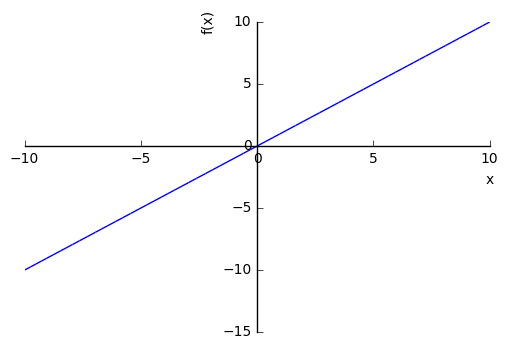

In [4]:
x = symbols('x')
p = plot(x)

In [5]:
p # instancia de la clase Plot 

In [6]:
p[0] # esta será la primera de las componentes de este objeto, en caso de que tuviera varias

In [7]:
p[0].label # una opción de este objeto relacionado con una de sus etiquetas

'x'

In [8]:
p.legend # opción global de plot relacionada con la leyenda del mismo

False

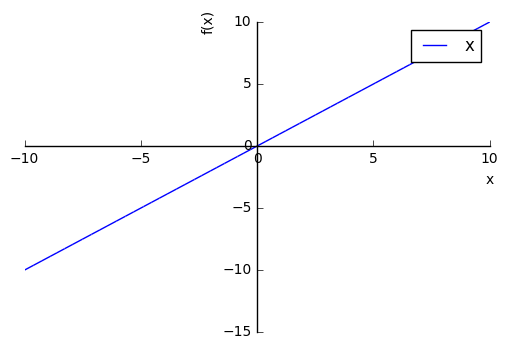

In [9]:
p.legend = True

p.show()

Por supuesto que se podrán representar diferentes funciones en el mismo plot, pero no como sigue a continuación

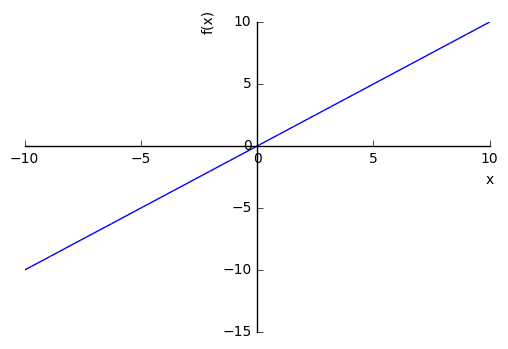

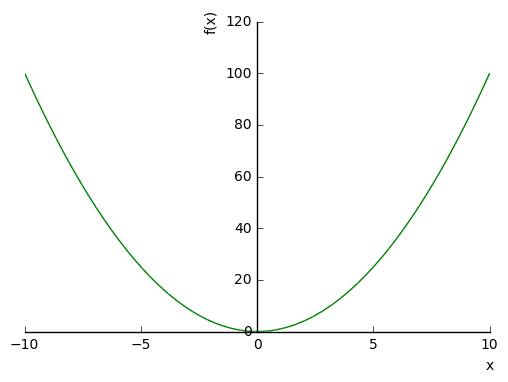

In [10]:
grafico1 = plot(x,xline_color='r');
grafico2 = plot(x**2,line_color='g');

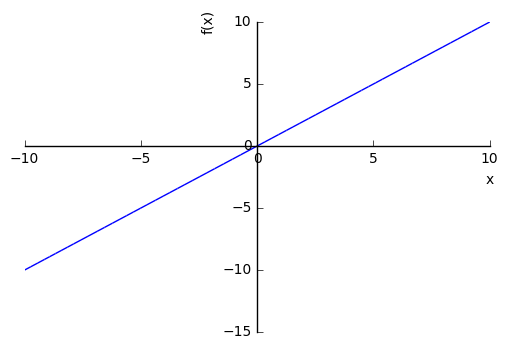

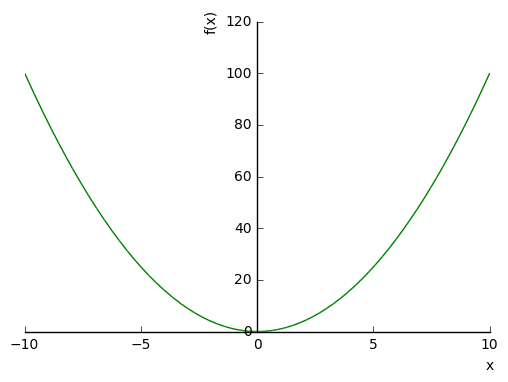

In [11]:
grafico1.show(), grafico2.show();

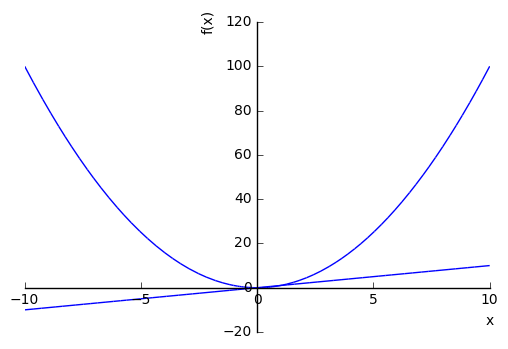

In [12]:
graficos = plot(x,x**2);  # así si

Ahora la cuestión sería intentar poner cada una de ellas en un color distinto, intentémoslo:

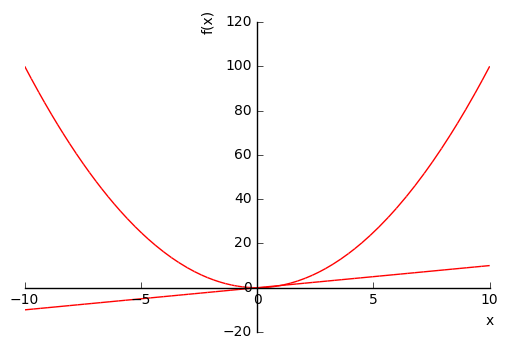

In [13]:
plot(x,x**2,line_color='r');

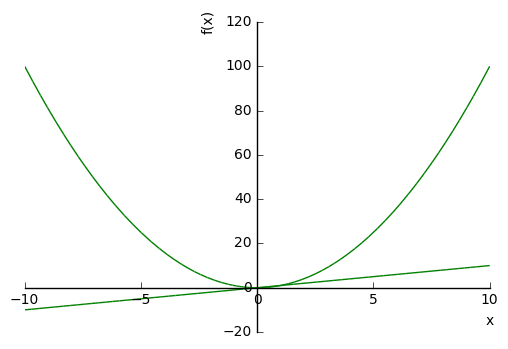

In [14]:
plot(x,x**2,line_color='g');

In [15]:
graficos[0].line_color='r'

In [16]:
graficos[1].line_color='g'

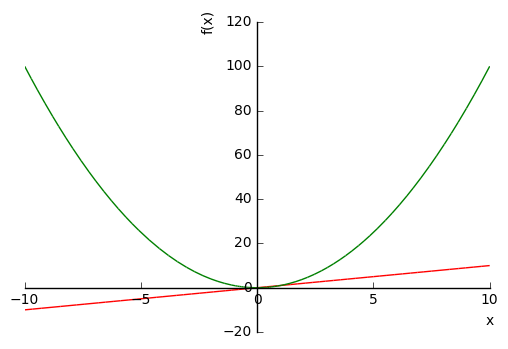

In [17]:
graficos.show()

---
**EJERCICIO** 

1. Representa conjuntamente y con diferente color las funciones seno y coseno en el intervalo $[0,2\pi]$:

También es posible ir generándo los gráficos en diferentes `plot` y añadirlos a una lista de gráficos ya definida previamente

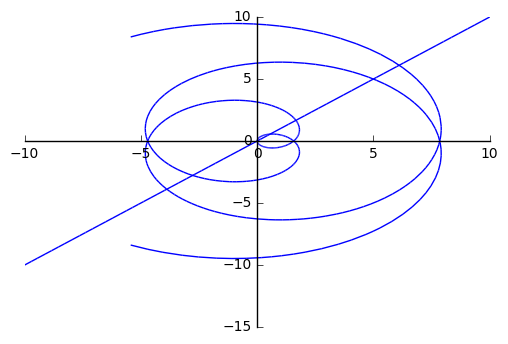

In [18]:
p1 = plot_parametric(x*sin(x),x*cos(x), show=False)

p1.extend(p) # Plot objects are just like lists.

p1.show()

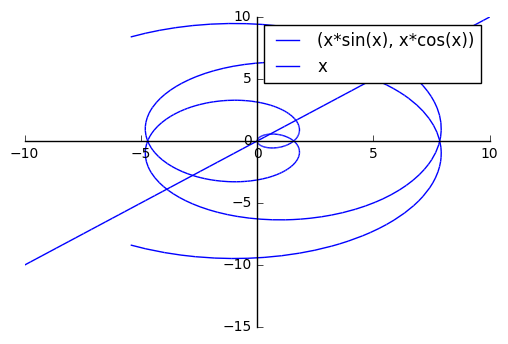

In [19]:
p1.legend = True

p1.show()

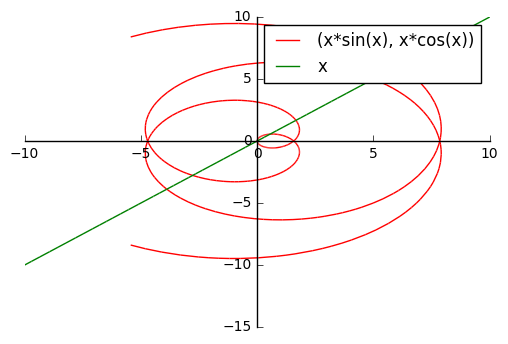

In [20]:
p1[0].line_color='r' # aquí estaríamos cambiando el color de la primera gráfica

p1[1].line_color='g' # y aquí el de la segunda

p1.show()            # para volver a mostrarlas de nuevo conjuntamente

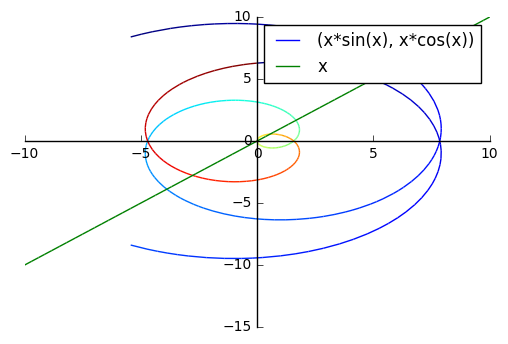

In [21]:
#  también podríamos darles colores dependientes de cierto parámetro
p1[0].line_color = lambda a : a 
p1.show()

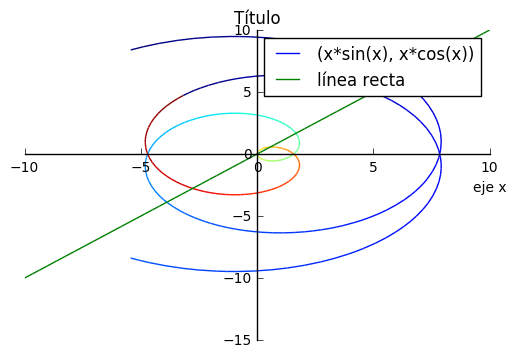

In [22]:
p1.title = 'Título'

p1.xlabel = 'eje x'

p1[1].label = 'línea recta'

p1.show()

In [23]:
p1.aspect_ratio

'auto'

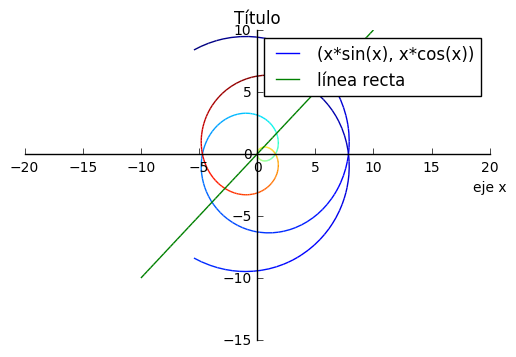

In [24]:
p1.aspect_ratio = (1,1)  # no siempre el gráfico va a respetar esta relación

p1.xlim = (-20,20)

p1.show()

In [25]:
p1._backend.ax.get_xlim()  # ésta sería una manera de recuperar los valores actuales de `xlim`


(-20.0, 20.0)

## Añadiendo más colores a un gráfico

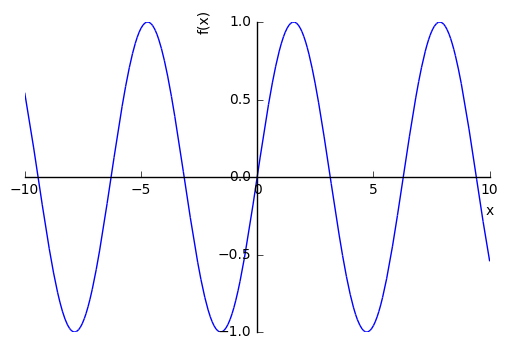

In [26]:
p = plot(sin(x))

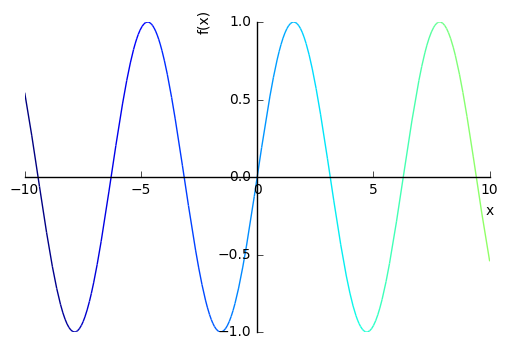

In [27]:
p[0].line_color = lambda a : a

p.show()

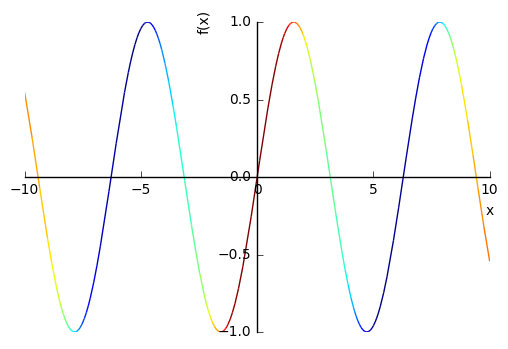

In [28]:
p[0].line_color = lambda a, b : b

p.show()

## Añadiendo más gráficas a una figura

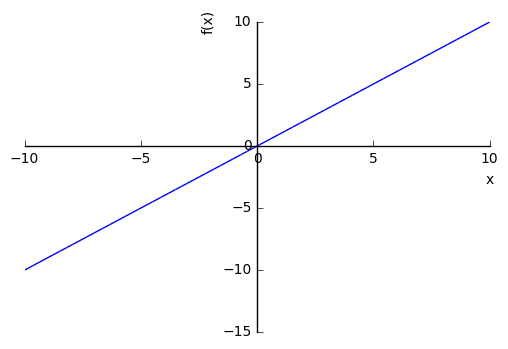

In [29]:
p = plot(x)

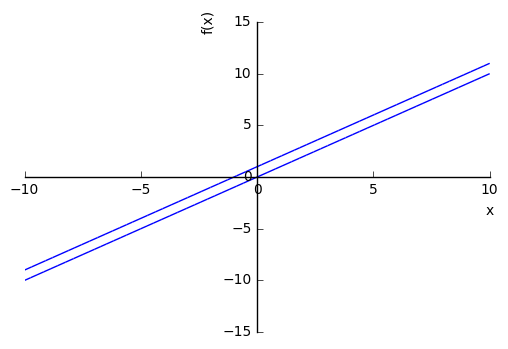

In [30]:
p.extend(plot(x+1, show=False))

p.show()

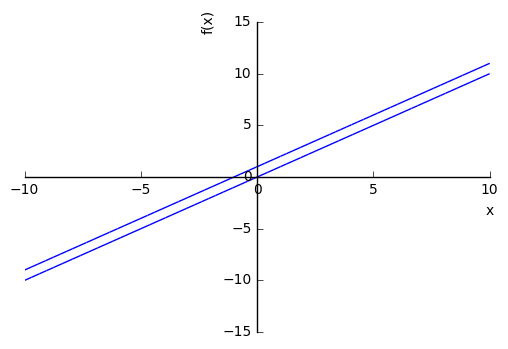

In [31]:
p.show()

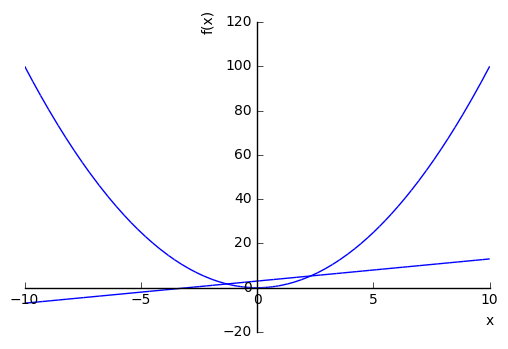

In [32]:
plot(x+3,x**2);

In [33]:
plot(x+3,x**2,show=False)[1]

In [34]:
p.append(plot(x+3,x**2,show=False)[0])

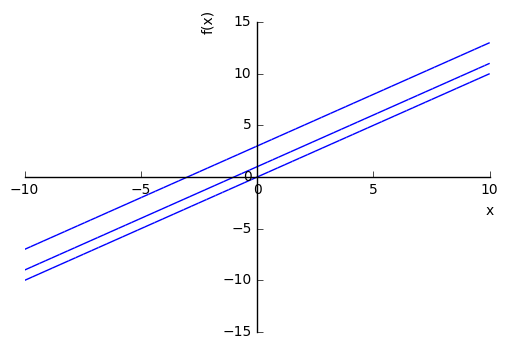

In [35]:
p.show()

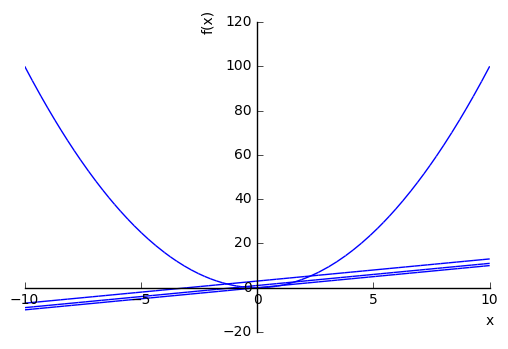

In [36]:
p.append(plot(x+3, x**2, show=False)[1])

p.show()

##  Tipos diferentes de plots

### ``plot``

El comando ``plot`` usa por defecto un algoritmo recursivo adaptativo para dibujar una línea de puntos que aproxima la verdadera gráfica de la función a ser representada. La nivel por defecto de profundidad en dicha recursión es 12, lo que significa que la función será estimada en un número máximo de $2^{12}$ puntos.

In [37]:
help(plot)

Help on function plot in module sympy.plotting.plot:

plot(*args, **kwargs)
    Plots a function of a single variable and returns an instance of
    the ``Plot`` class (also, see the description of the
    ``show`` keyword argument below).
    
    The plotting uses an adaptive algorithm which samples recursively to
    accurately plot the plot. The adaptive algorithm uses a random point near
    the midpoint of two points that has to be further sampled. Hence the same
    plots can appear slightly different.
    
    Usage
    =====
    
    Single Plot
    
    ``plot(expr, range, **kwargs)``
    
    If the range is not specified, then a default range of (-10, 10) is used.
    
    Multiple plots with same range.
    
    ``plot(expr1, expr2, ..., range, **kwargs)``
    
    If the range is not specified, then a default range of (-10, 10) is used.
    
    Multiple plots with different ranges.
    
    ``plot((expr1, range), (expr2, range), ..., **kwargs)``
    
    Range has to be 

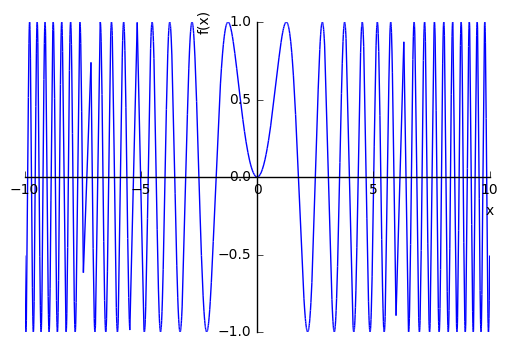

In [38]:
plot(sin(x**2)); # gráfico con muestreso adaptativo y rango por defecto en abcisas de (-10, 10)

Por supuesto que también se puede especificar la profundidad de dicha recursión, o incluso desabilitarla y usar una partición uniforme de ``nb_of_points`` puntos.

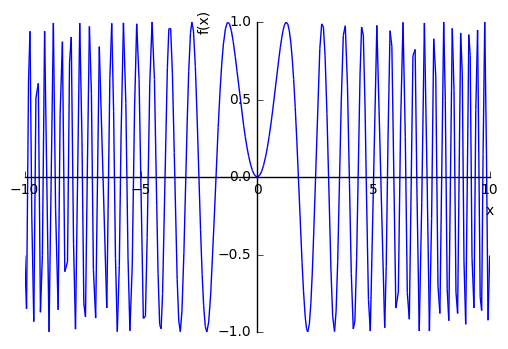

In [39]:
plot(sin(x**2), depth=7);  # especificando la profundidad de la recursión.

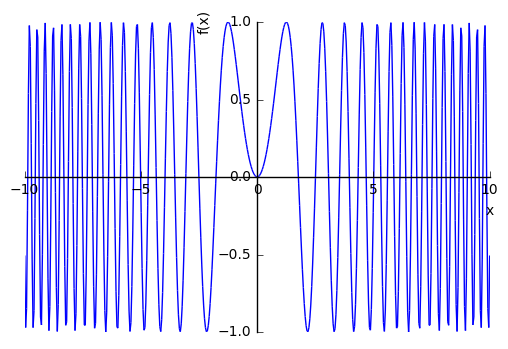

In [40]:
plot(sin(x**2), adaptive=False, nb_of_points=500); # desabilitándola

### ``plot_parametric``

``plot_parametric`` también usa un algoritmo recursivo adaptativo para evaluar la función paramétrica.

In [41]:
help(plot_parametric)

Help on function plot_parametric in module sympy.plotting.plot:

plot_parametric(*args, **kwargs)
    Plots a 2D parametric plot.
    
    The plotting uses an adaptive algorithm which samples recursively to
    accurately plot the plot. The adaptive algorithm uses a random point near
    the midpoint of two points that has to be further sampled. Hence the same
    plots can appear slightly different.
    
    Usage
    =====
    
    Single plot.
    
    ``plot_parametric(expr_x, expr_y, range, **kwargs)``
    
    If the range is not specified, then a default range of (-10, 10) is used.
    
    Multiple plots with same range.
    
    ``plot_parametric((expr1_x, expr1_y), (expr2_x, expr2_y), range, **kwargs)``
    
    If the range is not specified, then a default range of (-10, 10) is used.
    
    Multiple plots with different ranges.
    
    ``plot_parametric((expr_x, expr_y, range), ..., **kwargs)``
    
    Range has to be specified for every expression.
    
    Default ran

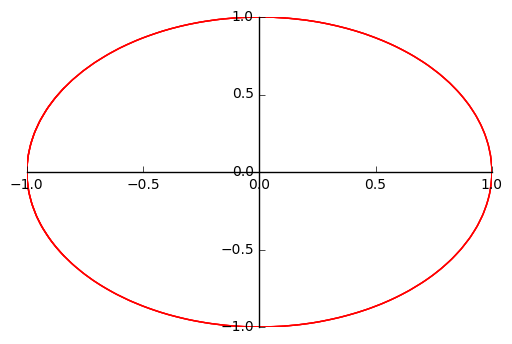

In [42]:
plot_parametric(cos(x), sin(x),line_color='r');

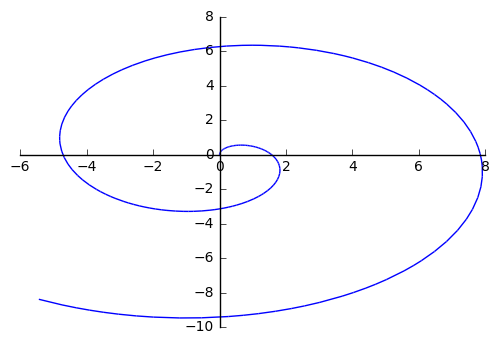

In [43]:
p = plot_parametric(x*sin(x), x*cos(x), (x,  0, 10))

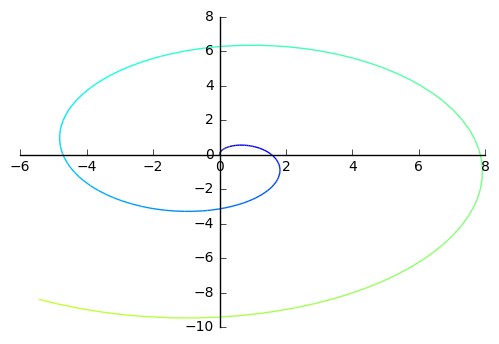

In [44]:
p[0].line_color = lambda a : a

p.show()

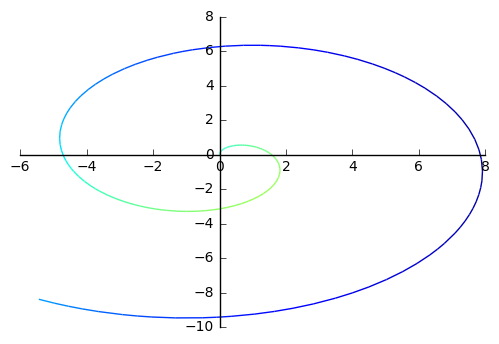

In [45]:
p[0].line_color = lambda a, b : a

p.show()

Gráficos múltiples.

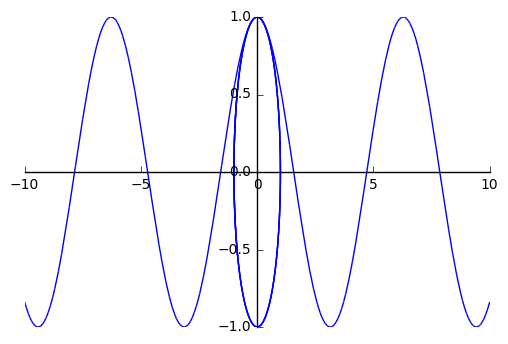

In [46]:
grafico = plot_parametric((cos(x), sin(x)), (x, cos(x)));

In [47]:
grafico[0]

También podemos combinar gráficos en paramétricas con gráficos en explícitas.

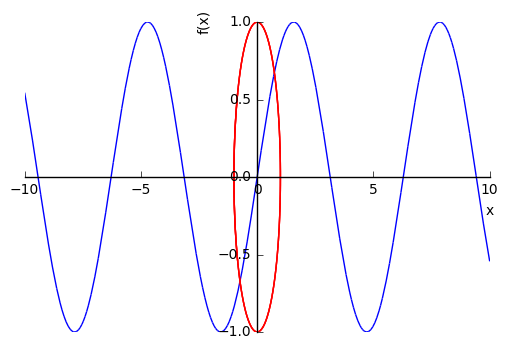

In [48]:
p = plot(sin(x), show=False)



p.extend(plot_parametric(cos(x), sin(x),line_color='r',show=False))

p.show()

### ``plot3d`` para gráficos de funciones explícitas en 3D

In [49]:
help(plot3d)

Help on function plot3d in module sympy.plotting.plot:

plot3d(*args, **kwargs)
    Plots a 3D surface plot.
    
    Usage
    =====
    
    Single plot
    
    ``plot3d(expr, range_x, range_y, **kwargs)``
    
    If the ranges are not specified, then a default range of (-10, 10) is used.
    
    Multiple plot with the same range.
    
    ``plot3d(expr1, expr2, range_x, range_y, **kwargs)``
    
    If the ranges are not specified, then a default range of (-10, 10) is used.
    
    Multiple plots with different ranges.
    
    ``plot3d((expr1, range_x, range_y), (expr2, range_x, range_y), ..., **kwargs)``
    
    Ranges have to be specified for every expression.
    
    Default range may change in the future if a more advanced default range
    detection algorithm is implemented.
    
    Arguments
    
    ``expr`` : Expression representing the function along x.
    
    ``range_x``: (x, 0, 5), A 3-tuple denoting the range of the x
    variable.
    
    ``range_y``: (y, 0, 

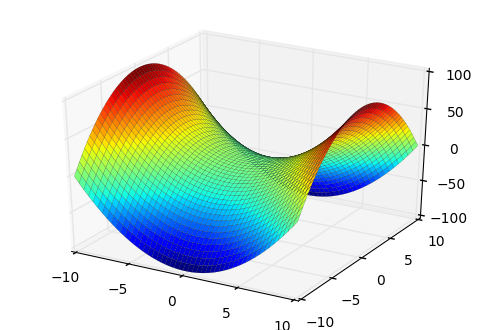

In [50]:
y = symbols('y')
plot3d(x**2-y**2);

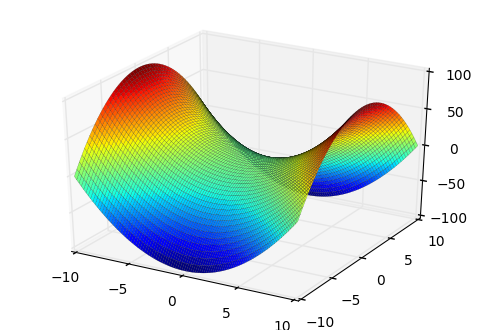

In [51]:
plot3d(x**2-y**2, nb_of_points_x=100, nb_of_points_y=50);

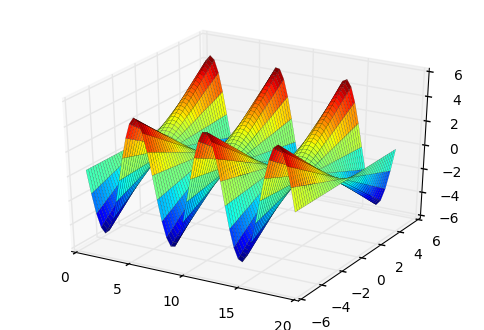

In [52]:
p = plot3d(sin(x)*y, (x, 0, 6*pi), (y, -5, 5))

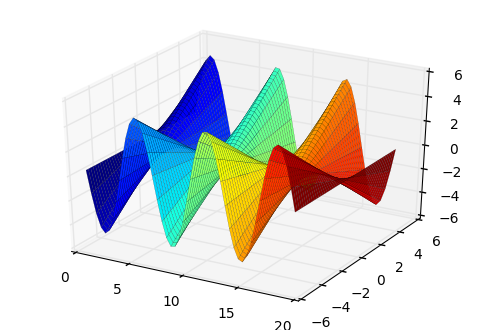

In [53]:
p[0].surface_color = lambda a : a

p.show()

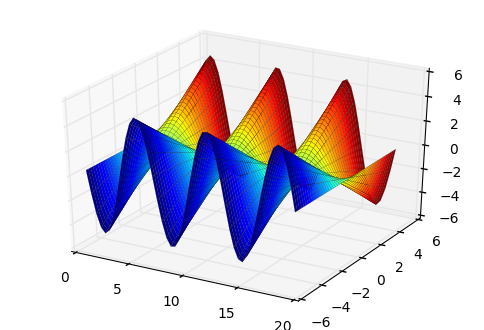

In [54]:
p[0].surface_color = lambda a, b : b

p.show()

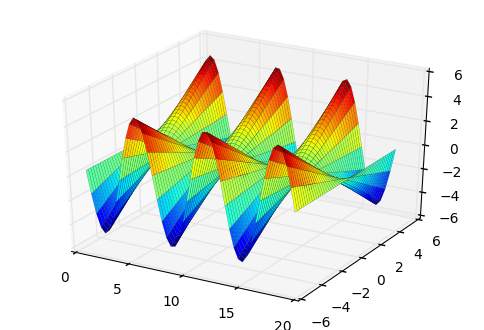

In [55]:
p[0].surface_color = lambda a, b, c : c

p.show()

###  ``plot3_parametric_line``  para líneas en 3D parametrizadas

In [56]:
help(plot3d_parametric_line)

Help on function plot3d_parametric_line in module sympy.plotting.plot:

plot3d_parametric_line(*args, **kwargs)
    Plots a 3D parametric line plot.
    
    Usage
    =====
    
    Single plot:
    
    ``plot3d_parametric_line(expr_x, expr_y, expr_z, range, **kwargs)``
    
    If the range is not specified, then a default range of (-10, 10) is used.
    
    Multiple plots.
    
    ``plot3d_parametric_line((expr_x, expr_y, expr_z, range), ..., **kwargs)``
    
    Ranges have to be specified for every expression.
    
    Default range may change in the future if a more advanced default range
    detection algorithm is implemented.
    
    Arguments
    
    ``expr_x`` : Expression representing the function along x.
    
    ``expr_y`` : Expression representing the function along y.
    
    ``expr_z`` : Expression representing the function along z.
    
    ``range``: ``(u, 0, 5)``, A 3-tuple denoting the range of the parameter
    variable.
    
    Keyword Arguments
    
    A

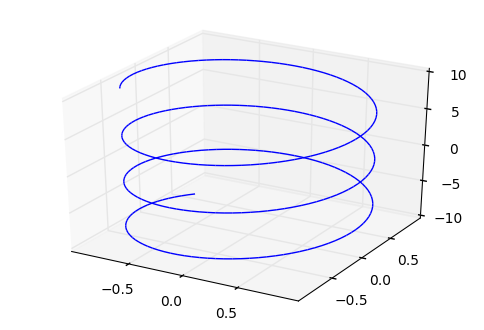

In [57]:
plot3d_parametric_line(cos(x), sin(x), x);

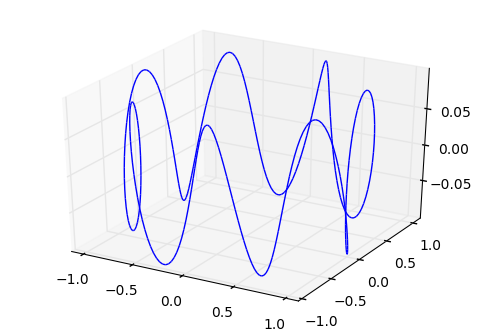

In [58]:
p = plot3d_parametric_line(sin(x)+0.1*sin(x)*cos(7*x),

         cos(x)+0.1*cos(x)*cos(7*x),

         0.1*sin(7*x),

         (x, 0, 2*pi))

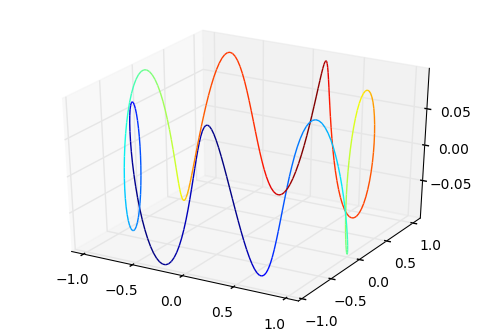

In [59]:
p[0].line_color = lambda a, b : b

p.show()

### ``plot3d_parametric_surface`` para superficies parametrizadas

In [60]:
help(plot3d_parametric_surface)

Help on function plot3d_parametric_surface in module sympy.plotting.plot:

plot3d_parametric_surface(*args, **kwargs)
    Plots a 3D parametric surface plot.
    
    Usage
    =====
    
    Single plot.
    
    ``plot3d_parametric_surface(expr_x, expr_y, expr_z, range_u, range_v, **kwargs)``
    
    If the ranges is not specified, then a default range of (-10, 10) is used.
    
    Multiple plots.
    
    ``plot3d_parametric_surface((expr_x, expr_y, expr_z, range_u, range_v), ..., **kwargs)``
    
    Ranges have to be specified for every expression.
    
    Default range may change in the future if a more advanced default range
    detection algorithm is implemented.
    
    Arguments
    
    ``expr_x``: Expression representing the function along ``x``.
    
    ``expr_y``: Expression representing the function along ``y``.
    
    ``expr_z``: Expression representing the function along ``z``.
    
    ``range_u``: ``(u, 0, 5)``,  A 3-tuple denoting the range of the ``u``
    v

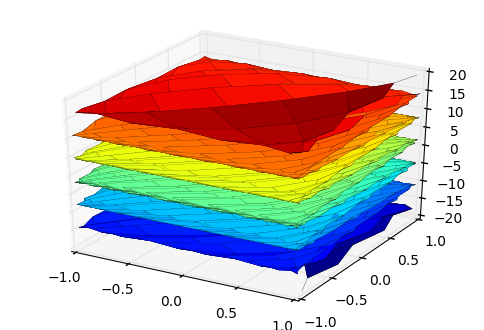

In [61]:
plot3d_parametric_surface(cos(x + y), sin(x - y), x - y);

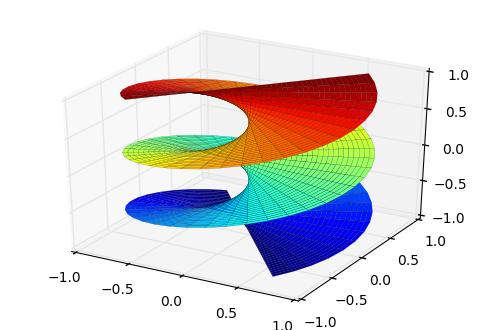

In [62]:
p = plot3d_parametric_surface(x*cos(4*y), x*sin(4*y), y,

         (x, -1, 1), (y, -1, 1))

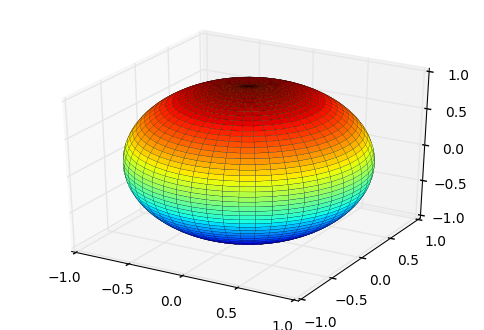

In [63]:
x , y = symbols('x,y')
p = plot3d_parametric_surface(sin(x)*sin(y), sin(x)*cos(y), cos(x), (x, 0, pi), (y, 0, 2*pi))

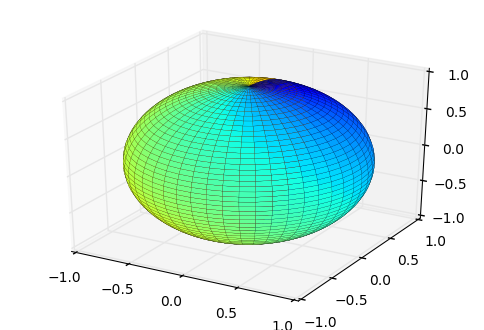

In [64]:
p[0].surface_color = lambda a, b : a+b

p.show()

## Valores  complejos

Por regla general si se encuentran valores complejos durante la representación gráfica, éstos serán descartados por defecto.

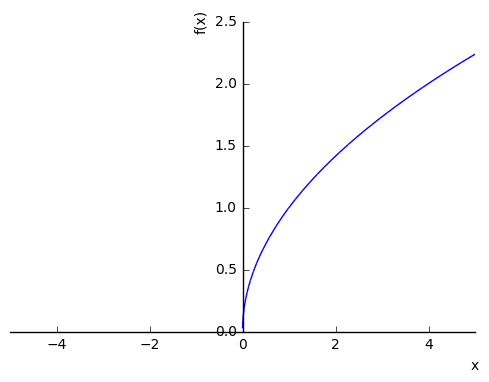

In [65]:
plot(sqrt(x), (x, -5, 5));

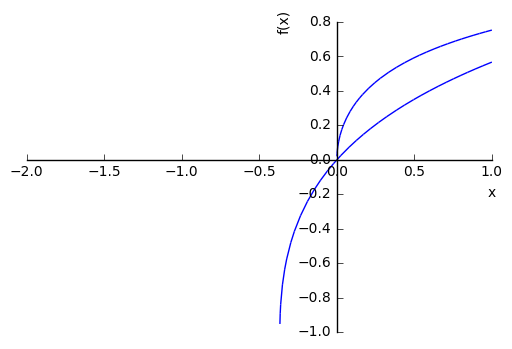

In [66]:
plot(LambertW(x), sqrt(LambertW(x)), (x, -2, 1))



## Textplot



Esta es una `backend` que emula el antiguo trazado gráfico de las terminales sin tarjeta gráfica.

In [67]:
pt = plot(sin(x),show=False)

In [68]:
pt.backend = plot_backends['text']

In [69]:
pt.show()

0.99935 |               ..               ...              . .    
        |              .  .             .                        
        |                                   .            .   .   
        |             .    .                                     
        | .                            .                      .  
        |                                    .          .        
        |            .      .                                    
        |  .                          .                        . 
      0 | ------------------------------------.--------.---------
        |           .        .                                   
        |   .                        .                          .
        |                                      .      .          
        |          .          .                                  
        |    .                      .                            
        |                                       .    .           
        | 

## Gráficos discontínuos y con asíntotas

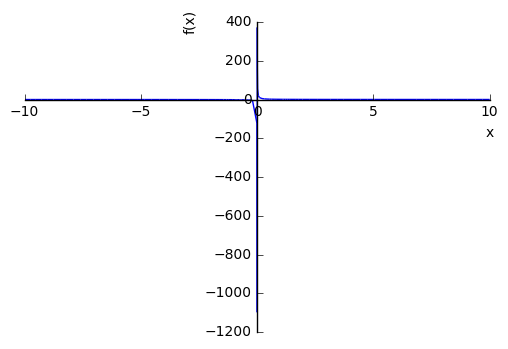

In [70]:
plot(1/x);

In [71]:
?plot

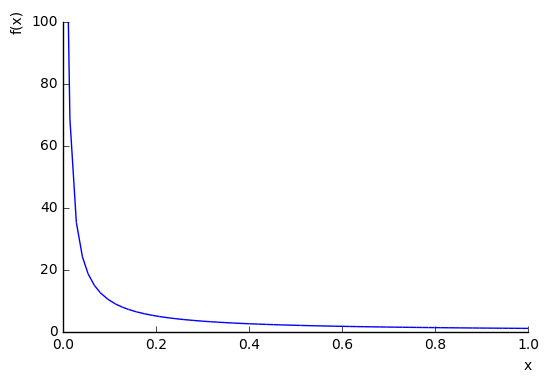

In [72]:
plot(1/x,(x, 0, 1),ylim = (0,100));

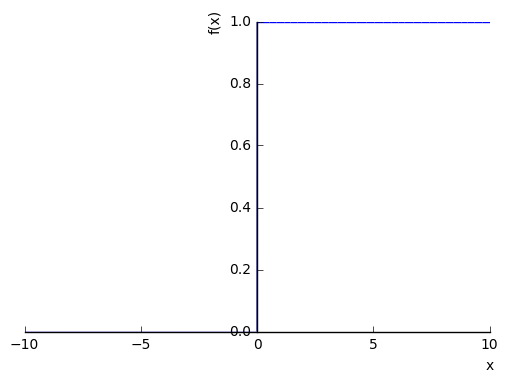

In [73]:
plot(Heaviside(x));

## Usando gráficos para representar operaciones complicadas

In [74]:
integral = Integral(log((sin(x)**2+1)*sqrt(x**2+1)),(x,0,y))
integral

Integral(log(sqrt(x**2 + 1)*(sin(x)**2 + 1)), (x, 0, y))

In [75]:
integral.evalf(subs={y:1})

0.358090090085057

C:\Program Files\Anaconda3\lib\site-packages\sympy\plotting\experimental_lambdify.py:230: UserWarning: The evaluation of the expression is problematic. We are trying a failback method that may still work. Please report this as a bug.
  warnings.warn('The evaluation of the expression is'


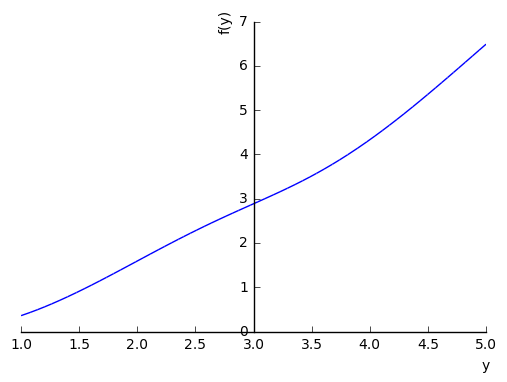

In [76]:
plot(integral,(y, 1, 5));

In [77]:
suma = summation(1/x**y,(x,1,oo))
suma

Piecewise((zeta(y), y > 1), (Sum(x**(-y), (x, 1, oo)), True))

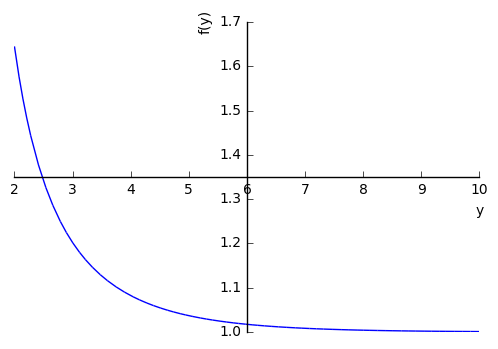

In [78]:
plot(suma, (y, 2, 10));

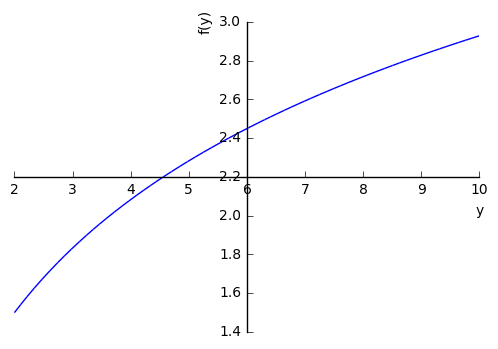

In [79]:
p = plot(summation(1/x,(x,1,y)), (y, 2, 10))

C:\Program Files\Anaconda3\lib\site-packages\sympy\core\sympify.py:282: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rational=rational) for x in a])
C:\Program Files\Anaconda3\lib\site-packages\sympy\plotting\experimental_lambdify.py:165: UserWarning: The evaluation of the expression is problematic. We are trying a failback method that may still work. Please report this as a bug.
  warnings.warn('The evaluation of the expression is'


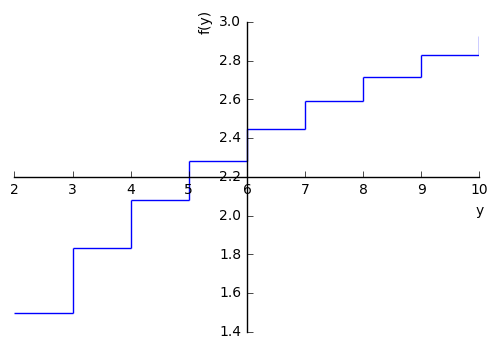

In [80]:
p[0].only_integers = True

p[0].steps = True

p.show()